## 1. Optimization and Fitting [20 pts]

In [ ]:
import numpy as np
import math
def fc_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    
    The input x has shape (N, Din) and contains a minibatch of N
    examples, where each example x[i] has shape (Din,).
    
    Inputs:
    - x: A numpy array containing input data, of shape (N, Din)
    - w: A numpy array of weights, of shape (Din, Dout)
    - b: A numpy array of biases, of shape (Dout,)
    
    Returns a tuple of:
    - out: output, of shape (N, Dout)
    - cache: (x, w, b)
    """
    
    ###########################################################################
    # TODO: Implement the forward pass. Store the result in out.              #
    ###########################################################################
    N, Din=(x.shape)
    Din, Dout=(w.shape)
    b_batch = np.repeat(b[np.newaxis, :], N, axis=0)
    assert b_batch.shape == (N, len(b))
    out = x.dot(w) + b_batch
    cache = (x, w, b)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache


def fc_backward(dout, cache):
    """
    Computes the backward pass for a fully_connected layer.
    
    Inputs:
    - dout: Upstream derivative, of shape (N, Dout)
    - cache: returned by your forward function. Tuple of:
      - x: Input data, of shape (N, Din)
      - w: Weights, of shape (Din, Dout)
      - b: Biases, of shape (Dout,)
      
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, Din)
    - dw: Gradient with respect to w, of shape (Din, Dout)
    - db: Gradient with respect to b, of shape (Dout,)
    """
    
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    x, w, b = cache
    dx = dout.dot(w.T)
    dw = np.zeros(w.shape)
    db = np.zeros(b.shape)
    for i in range(x.shape[0]):
        dw += np.outer(x[i], dout[i])
        db += dout[i]
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db
'''
def linear_loss():
  S = np.ones((2,2))
  t = np.zeros(2)
  XY = np.load("/content/sample_data/points_case.npy")
  X, Y = XY[:,:2], XY[:,2:]
  fwd, cache = fc_forward(X,S,t)
  (x, W, b)=cache
  ll=W.dot(x.T)+b
  return ll
'''
def l2_loss(x, y):
    """
    Computes the loss and gradient of L2 loss.
    loss = 1/N * sum((x - y)**2)

    Inputs:
    - x: Input data, of shape (N, D)
    - y: Output data, of shape (N, D)

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    
    ###########################################################################
    # TODO: Implement L2 loss                                                 #
    ###########################################################################
    N, Din=(x.shape)
    y_array = np.array(y, dtype=float)
    x_array = np.array(x, dtype=float)
    loss = (np.sum((x - y)**2))/N
    dx = np.dot(x.T, loss)/N
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, dx

import numpy as np
import matplotlib.pyplot as plt


def lsq(X,Y, learning_rate = 0.01):
    """
    Inputs:
    - X: Array, of shape (N,2)
    - Y: Array, of shape (N,2)
    - learning_rate: A scalar for initial learning rate
    """
    S = np.ones((2,2))
    t = np.zeros(2)

    for i in range(10000):
        fwd, cache = fc_forward(X,S,t)
        loss, dloss = l2_loss(fwd,Y)
        dx, dS, dt = fc_backward(dloss,cache)
        # You now have the derivative of w in dw and the derivative 
        # of b in dd, update w, b with gradient descent
  
    return S, t
        
def main():
    XY = np.load("/content/sample_data/points_case.npy")
    x, y = XY[:,:2], XY[:,2:]
    print(x,y)
    S, t = lsq(x, y)
    print(S, t)
    y_hat = x.dot(S) + t
    plt.scatter(x[:,0],x[:,1],c="red")
    plt.scatter(y[:,0],y[:,1],c="green")
    plt.scatter(y_hat[:,0],y_hat[:,1],c="blue",marker='.')
    plt.savefig("/content/sample_data/case.jpg")
main()

## 2. Softmax Classifier with One Layer Neural Network [40 pts]


In [ ]:
!git clone https://github.com/zhangjh915/Softmax-Classifier-on-cifar10.git

Cloning into 'Softmax-Classifier-on-cifar10'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [ ]:
!pip install cifar10

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!python /content/Softmax-Classifier-on-cifar10/model_visualization.py

tcmalloc: large alloc 1228800000 bytes == 0x563a5a86c000 @  0x7fa8a63591e7 0x7fa8a3ed946e 0x7fa8a3f29c7b 0x7fa8a3f29d18 0x7fa8a3fd1010 0x7fa8a3fd173c 0x7fa8a3fd185d 0x563a0d264749 0x7fa8a3f16ef7 0x563a0d262437 0x563a0d262240 0x563a0d2d5973 0x563a0d2d09ee 0x563a0d263bda 0x563a0d2d5d00 0x563a0d263afa 0x563a0d2d1915 0x563a0d263afa 0x563a0d2d1915 0x563a0d2d0ced 0x563a0d263bda 0x563a0d2d1915 0x563a0d2d09ee 0x563a0d2d06f3 0x563a0d39a4c2 0x563a0d39a83d 0x563a0d39a6e6 0x563a0d372163 0x563a0d371e0c 0x7fa8a5143bf7 0x563a0d371cea
tcmalloc: large alloc 1228800000 bytes == 0x563aa3c4c000 @  0x7fa8a63591e7 0x7fa8a3ed946e 0x7fa8a3f29c7b 0x7fa8a3f29d97 0x7fa8a3f234a5 0x7fa8a3ff429c 0x7fa8a3fc1dd1 0x563a0d1a32eb 0x563a0d2d718e 0x563a0d2d09ee 0x563a0d263bda 0x563a0d2d2737 0x563a0d2d09ee 0x563a0d1a2eb0 0x7fa8a3f16ef7 0x563a0d262437 0x563a0d262240 0x563a0d2d5973 0x563a0d2d09ee 0x563a0d263bda 0x563a0d2d5d00 0x563a0d263afa 0x563a0d2d1915 0x563a0d2d0ced 0x563a0d263bda 0x563a0d2d1915 0x563a0d2d09ee 0x563a0d2d

In [ ]:
import _pickle as pickle
import numpy as np
import os


def load_data_batch(filename):
    """ Load one batch of cifar in 'cifar-10-batches-py' with name 'data_batch_i'."""
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
        x, y = data['data'], np.array(data['labels'])
        x = x.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        return x, y


def load_data(path):
    """ Load all batches of cifar in 'cifar-10-batches-py' with name 'data_batch_i' as training sets
        and 'test_batch' as test set."""
    xtrain = []
    ytrain = []
    for i in range(1, 6):
        f = os.path.join(path, 'data_batch_%d' % i)
        x, y = load_data_batch(f)
        xtrain.append(x)
        ytrain.append(y)
    xtrain = np.concatenate(xtrain)
    ytrain = np.concatenate(ytrain)
    xtest, ytest = load_data_batch(os.path.join(path, 'test_batch'))
    return xtrain, ytrain, xtest, ytest


def load_dataset():
    # Load data-set.
    data_path = '/content/sample_data/cifar-10-batches-py/'
    x_train, y_train, x_test, y_test = load_data(data_path)
    print('yyyyyyyyyyyyyyyyyyyyyyyyyyyyy')
    # Pre-process. Reshape RGB images into unbiased row vectors.
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    x_mean_train = np.mean(x_train, axis=0)
    x_train -= x_mean_train
    x_test -= x_mean_train

    # Add a row in data to fit the relation y = Wx.
    x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))]).T
    x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))]).T
    return x_train, y_train, x_test, y_test


In [ ]:
import numpy as np
from random import randrange


def eval_numerical_gradient(f, x):
    """
    Implementation of numerical gradient of f at x.
    Arguments:
        f: a function that takes a single argument
        x: the point (numpy array) to evaluate the gradient at
    """

    fx = f(x)  # Evaluate f(x)
    grad = np.zeros(x.shape)  # Initializaion of the gradient
    h = 1e-5  # Increment size

    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # Evaluate function at x+h
        ix = it.multi_index
        x[ix] += h  # Increment by h at dimension index ix
        fxh = f(x)  # Evaluate f(x + h)
        x[ix] -= h  # Restore to previous value, or the partial derivative and f(x+h) in the next step will be affected

        # Compute the partial derivative
        grad[ix] = (fxh - fx) / h  # Calculate the slope
        print(ix, grad[ix])
        it.iternext()  # Step to the next dimension index

    return grad


def grad_check(f, x, analytic_grad, num_check_pairs):
    """
    Sample a few random elements and check the difference of numerical and analytical gradients.
    Arguments:
        f: a function that takes a single argument
        x: the point (numpy array) to evaluate the gradient at
        analytic_grad: Calculated gradient using analytical method
        num_check_pairs: Number of analytical-numerical gradient pairs you want to check
    """
    h = 1e-5

    for i in range(num_check_pairs):
        # Here the numerical gradients are calculated using df/dx = (f(x+h)+f(x-h))/2h
        ix = tuple([randrange(m) for m in x.shape])
        x[ix] += h  # Increment by h at dimension index ix
        fxph = f(x)  # Evaluate f(x + h)
        x[ix] -= 2 * h  # Decrement by h at dimension index ix
        fxmh = f(x)  # Evaluate f(x - h)
        x[ix] += h  # Reset x

        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        relative_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
        print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, relative_error))



In [ ]:
import numpy as np


class SoftmaxClassifier:
    def __init__(self):
        # Random initialization of W
        C, D = 10, 3073  # C :number of classes, D: dimension of each flattened image
        self.W = np.random.randn(C, D) * 0.001

    def train(self, x, y, lr=1e-4, reg=1e-2, num_iters=1000, batch_size=250):
        """
        Train the model using stochastic gradient descent.
        Arguments:
            x: D * N numpy array as the training data, where D is the dimension and N the training sample size
            y: 1D numpy array with length N as the labels for the training data
            lr: learning rate
            reg: regularization factor
            num_iters: number of iterations for training
            batch_size: batch size for the calculation of the mini-batch gradient descent
        Output:
            loss_record: Array containing the cross entropy loss history during the training process
        """
        _, N = x.shape  # N is the sample size

        # Train the model using mini-batch stochastic gradient descent.
        loss_record = []
        for it in range(num_iters):
            # Randomly chosen mini-batch
            indices = np.random.choice(N, batch_size, replace=True)
            x_batch = x[:, indices]
            y_batch = y[indices]

            # Calculate loss and gradient for the iteration
            loss, grad = self.cross_entropy_loss(x_batch, y_batch, reg)
            loss_record.append(loss)

            # Update W
            self.W -= lr * grad

        return loss_record

    def predict(self, x):
        """
        Predict labels using the trained model.
        Arguments:
            x: D * N numpy array as the test data, where D is the dimension and N the test sample size
        Output:
            y_pred: 1D numpy array with length N as the predicted labels for the test data
        """
        y = self.W.dot(x)
        y_pred = np.argmax(y, axis=0)
        return y_pred

    def cross_entropy_loss(self, x, y, reg):
        """
        Calculate the cross-entropy loss and the gradient for each iteration of training.
        Arguments:
            x: D * N numpy array as the training data, where D is the dimension and N the training sample size
            y: 1D numpy array with length N as the labels for the training data
        Output:
            loss: a float number of calculated cross-entropy loss
            dW: C * D numpy array as the calculated gradient for W, where C is the number of classes, and 10 for this model
        """

        # Calculation of loss
        z = np.dot(self.W, x)
        z -= np.max(z, axis=0)  # Max trick for the softmax, preventing infinite values
        p = np.exp(z) / np.sum(np.exp(z), axis=0)  # Softmax function
        L = -1 / len(y) * np.sum(np.log(p[y, range(len(y))]))  # Cross-entropy loss
        R = 0.5 * np.sum(np.multiply(self.W, self.W))  # Regularization term
        loss = L + R * reg  # Total loss

        # Calculation of dW
        p[y, range(len(y))] -= 1
        dW = 1 / len(y) * p.dot(x.T) + reg * self.W
        return loss, dW


yyyyyyyyyyyyyyyyyyyyyyyyyyyyy
Training data shape:  (3073, 50000)      Train labels shape:  (50000,)
Test data shape:      (3073, 10000)      Test labels shape:  (10000,)

Gradient Check:
numerical: -2.044911 analytic: -2.044911, relative error: 1.947441e-09
numerical: 1.625009 analytic: 1.625009, relative error: 9.014891e-10
numerical: -4.283467 analytic: -4.283467, relative error: 2.008949e-09
numerical: -2.122717 analytic: -2.122717, relative error: 4.315360e-09
numerical: 0.311321 analytic: 0.311321, relative error: 3.717566e-08
numerical: 1.647495 analytic: 1.647495, relative error: 5.073209e-10
numerical: 10.736572 analytic: 10.736572, relative error: 4.976703e-11
numerical: 0.982611 analytic: 0.982611, relative error: 5.150275e-09
numerical: 0.566655 analytic: 0.566655, relative error: 1.217142e-08
numerical: 2.837318 analytic: 2.837318, relative error: 1.329818e-09

Training
[161.08148639420608, 156.9228195693061, 153.80876143448785, 150.78725874022865, 147.46427742043767, 144.

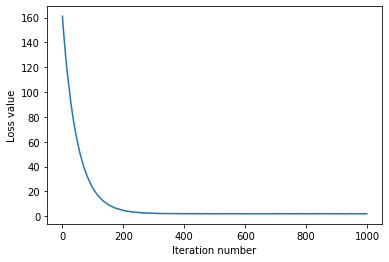

Validation
[1.4032152354896672, 1.3316009425072417, 1.3109525265491588, 1.2368609625480456, 1.1836664437469864, 1.1614707547521703, 1.2313629724738993, 1.1978764402987327, 1.1273479566935125, 1.1329677865779442, 1.2022526070211161, 1.1505682496312797, 1.1591245869549442, 1.157886200562814, 1.1509616628618808, 1.1569378501019258, 1.1778017501368239, 1.1154419841831693, 1.1638311434095905, 1.1809059329802445, 1.1038533603709895, 1.0695172819336136, 1.0559485877434145, 1.1179096449617534, 1.1330779123506547, 1.0209553151839506, 1.1078151793347877, 1.04815308903331, 1.0682222559287697, 1.0768473225531214, 1.0979528448780975, 1.0560509760146168, 1.082627498192669, 1.0725441250007075, 1.0743002639778718, 1.0774600932087477, 1.0501847970404772, 1.0300292681511531, 1.020092308560832, 1.1250584462225572, 1.057650428335272, 1.0114010220555878, 1.0882981989166112, 1.0555766405176685, 1.0673028610759738, 1.0646654059353842, 1.0714773207474935, 1.0690550506189116, 1.023758539789737, 1.0797970659762

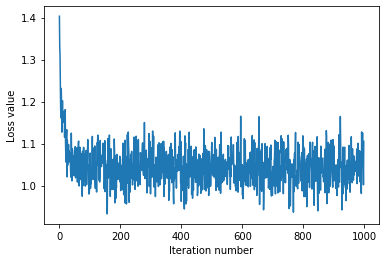

Accuracy of the Softmax classifier on the test set: 0.365500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


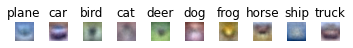

In [ ]:

import numpy as np
import matplotlib.pyplot
%matplotlib inline

def main():
    x_train, y_train, x_test, y_test = load_dataset()
    print('Training data shape: ', x_train.shape, '     Train labels shape: ', y_train.shape)
    print('Test data shape:     ', x_test.shape, '     Test labels shape: ', y_test.shape)
    print()

    classifier = SoftmaxClassifier()
    loss, grad = classifier.cross_entropy_loss(x_train, y_train, 1e-5)

    # Gradient check for the model
    f = lambda w: classifier.cross_entropy_loss(x_train, y_train, 0.0)[0]
    print('Gradient Check:')
    grad_check(f, classifier.W, grad, 10)
    print()

    print('Training')
    # Plot the loss for the training
    loss_record = classifier.train(x_train, y_train, lr=1e-6, reg=1e4)
    print(loss_record)
    matplotlib.pyplot.plot(loss_record)
    matplotlib.pyplot.xlabel('Iteration number')
    matplotlib.pyplot.ylabel('Loss value')
    matplotlib.pyplot.show()

    # Evaluation on test set

    y_test_pred = classifier.predict(x_test)
    accuracy = np.mean(y_test == y_test_pred)
    print('Validation')
    loss_record = classifier.train(x_test, y_test_pred, lr=1e-6, reg=1e4)
    print(loss_record)
    matplotlib.pyplot.plot(loss_record)
    matplotlib.pyplot.xlabel('Iteration number')
    matplotlib.pyplot.ylabel('Loss value')
    matplotlib.pyplot.show()
    print('Accuracy of the Softmax classifier on the test set: %f' % accuracy)

    # Visualize the learned weights for each class
    w = classifier.W[:, :-1]  # Strip out the bias
    w = w.reshape(10, 32, 32, 3)

    w_min, w_max = np.min(w), np.max(w)

    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    for i in range(10):
      for j in range(i,10):
        plt.subplot(10,10,i+1)
        # Rescale the weights to be between 0 and 255 for image representation
        w_img = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
        plt.imshow(w_img.astype('uint8'))
        plt.axis('off')
        plt.title(classes[i])
    plt.savefig('/content/Softmax-Classifier-on-cifar10/images/im.png')
    plt.show()


if __name__ == "__main__":
    main()


## 3. Softmax Classifier with Hidden Layers [20 pts]

In [ ]:
!git clone https://github.com/rahul1990gupta/scs231n.git

Cloning into 'scs231n'...
remote: Enumerating objects: 97, done.
remote: Total 97 (delta 0), reused 0 (delta 0), pack-reused 97
Unpacking objects: 100% (97/97), done.


In [ ]:
#https://ljvmiranda921.github.io/notebook/2017/02/17/artificial-neural-networks/
#https://github.com/rahul1990gupta/scs231n/blob/master/assignment1/cs231n/data_utils.py

In [ ]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2 MB 60 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.2.21 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from __future__ import print_function

from six.moves import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread
import platform

def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  with open(filename, 'rb') as f:
    datadict = load_pickle(f)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
  """ load all of cifar """
  xs = []
  ys = []
  for b in range(1,6):
    f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
    X, Y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
  return Xtr, Ytr, Xte, Yte


def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000,
                     subtract_mean=True):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for classifiers. These are the same steps as we used for the SVM, but
    condensed to a single function.
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/scs231n/assignment1/cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    if subtract_mean:
      mean_image = np.mean(X_train, axis=0)
      X_train -= mean_image
      X_val -= mean_image
      X_test -= mean_image
    
    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    X_test = X_test.transpose(0, 3, 1, 2).copy()

    # Package data into a dictionary
    return {
      'X_train': X_train, 'y_train': y_train,
      'X_val': X_val, 'y_val': y_val,
      'X_test': X_test, 'y_test': y_test,
    }
    

def load_tiny_imagenet(path, dtype=np.float32, subtract_mean=True):
  """
  Load TinyImageNet. Each of TinyImageNet-100-A, TinyImageNet-100-B, and
  TinyImageNet-200 have the same directory structure, so this can be used
  to load any of them.
  Inputs:
  - path: String giving path to the directory to load.
  - dtype: numpy datatype used to load the data.
  - subtract_mean: Whether to subtract the mean training image.
  Returns: A dictionary with the following entries:
  - class_names: A list where class_names[i] is a list of strings giving the
    WordNet names for class i in the loaded dataset.
  - X_train: (N_tr, 3, 64, 64) array of training images
  - y_train: (N_tr,) array of training labels
  - X_val: (N_val, 3, 64, 64) array of validation images
  - y_val: (N_val,) array of validation labels
  - X_test: (N_test, 3, 64, 64) array of testing images.
  - y_test: (N_test,) array of test labels; if test labels are not available
    (such as in student code) then y_test will be None.
  - mean_image: (3, 64, 64) array giving mean training image
  """
  # First load wnids
  with open(os.path.join(path, 'wnids.txt'), 'r') as f:
    wnids = [x.strip() for x in f]

  # Map wnids to integer labels
  wnid_to_label = {wnid: i for i, wnid in enumerate(wnids)}

  # Use words.txt to get names for each class
  with open(os.path.join(path, 'words.txt'), 'r') as f:
    wnid_to_words = dict(line.split('\t') for line in f)
    for wnid, words in wnid_to_words.iteritems():
      wnid_to_words[wnid] = [w.strip() for w in words.split(',')]
  class_names = [wnid_to_words[wnid] for wnid in wnids]

  # Next load training data.
  X_train = []
  y_train = []
  for i, wnid in enumerate(wnids):
    if (i + 1) % 20 == 0:
      print('loading training data for synset %d / %d' % (i + 1, len(wnids)))
    # To figure out the filenames we need to open the boxes file
    boxes_file = os.path.join(path, 'train', wnid, '%s_boxes.txt' % wnid)
    with open(boxes_file, 'r') as f:
      filenames = [x.split('\t')[0] for x in f]
    num_images = len(filenames)
    
    X_train_block = np.zeros((num_images, 3, 64, 64), dtype=dtype)
    y_train_block = wnid_to_label[wnid] * np.ones(num_images, dtype=np.int64)
    for j, img_file in enumerate(filenames):
      img_file = os.path.join(path, 'train', wnid, 'images', img_file)
      img = imread(img_file)
      if img.ndim == 2:
        ## grayscale file
        img.shape = (64, 64, 1)
      X_train_block[j] = img.transpose(2, 0, 1)
    X_train.append(X_train_block)
    y_train.append(y_train_block)
      
  # We need to concatenate all training data
  X_train = np.concatenate(X_train, axis=0)
  y_train = np.concatenate(y_train, axis=0)
  
  # Next load validation data
  with open(os.path.join(path, 'val', 'val_annotations.txt'), 'r') as f:
    img_files = []
    val_wnids = []
    for line in f:
      img_file, wnid = line.split('\t')[:2]
      img_files.append(img_file)
      val_wnids.append(wnid)
    num_val = len(img_files)
    y_val = np.array([wnid_to_label[wnid] for wnid in val_wnids])
    X_val = np.zeros((num_val, 3, 64, 64), dtype=dtype)
    for i, img_file in enumerate(img_files):
      img_file = os.path.join(path, 'val', 'images', img_file)
      img = imread(img_file)
      if img.ndim == 2:
        img.shape = (64, 64, 1)
      X_val[i] = img.transpose(2, 0, 1)

  # Next load test images
  # Students won't have test labels, so we need to iterate over files in the
  # images directory.
  img_files = os.listdir(os.path.join(path, 'test', 'images'))
  X_test = np.zeros((len(img_files), 3, 64, 64), dtype=dtype)
  for i, img_file in enumerate(img_files):
    img_file = os.path.join(path, 'test', 'images', img_file)
    img = imread(img_file)
    if img.ndim == 2:
      img.shape = (64, 64, 1)
    X_test[i] = img.transpose(2, 0, 1)

  y_test = None
  y_test_file = os.path.join(path, 'test', 'test_annotations.txt')
  if os.path.isfile(y_test_file):
    with open(y_test_file, 'r') as f:
      img_file_to_wnid = {}
      for line in f:
        line = line.split('\t')
        img_file_to_wnid[line[0]] = line[1]
    y_test = [wnid_to_label[img_file_to_wnid[img_file]] for img_file in img_files]
    y_test = np.array(y_test)
  
  mean_image = X_train.mean(axis=0)
  if subtract_mean:
    X_train -= mean_image[None]
    X_val -= mean_image[None]
    X_test -= mean_image[None]

  return {
    'class_names': class_names,
    'X_train': X_train,
    'y_train': y_train,
    'X_val': X_val,
    'y_val': y_val,
    'X_test': X_test,
    'y_test': y_test,
    'class_names': class_names,
    'mean_image': mean_image,
  }


def load_models(models_dir):
  """
  Load saved models from disk. This will attempt to unpickle all files in a
  directory; any files that give errors on unpickling (such as README.txt) will
  be skipped.
  Inputs:
  - models_dir: String giving the path to a directory containing model files.
    Each model file is a pickled dictionary with a 'model' field.
  Returns:
  A dictionary mapping model file names to models.
  """
  models = {}
  for model_file in os.listdir(models_dir):
    with open(os.path.join(models_dir, model_file), 'rb') as f:
      try:
        models[model_file] = load_pickle(f)['model']
      except pickle.UnpicklingError:
        continue
  return models

In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from past.builtins import xrange

class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network. The net has an input dimension of
  N, a hidden layer dimension of H, and performs classification over C classes.
  We train the network with a softmax loss function and L2 regularization on the
  weight matrices. The network uses a ReLU nonlinearity after the first fully
  connected layer.
  In other words, the network has the following architecture:
  input - fully connected layer - ReLU - fully connected layer - softmax
  The outputs of the second fully-connected layer are the scores for each class.
  """

  def __init__(self, input_size, hidden_size, output_size, std=1e-4):
    """
    Initialize the model. Weights are initialized to small random values and
    biases are initialized to zero. Weights and biases are stored in the
    variable self.params, which is a dictionary with the following keys:
    W1: First layer weights; has shape (D, H)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (H, C)
    b2: Second layer biases; has shape (C,)
    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
    self.params = {}
    self.params['W1'] = std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def loss(self, X, y=None, reg=0.0):
    """
    Compute the loss and gradients for a two layer fully connected neural
    network.
    Inputs:
    - X: Input data of shape (N, D). Each X[i] is a training sample.
    - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] < C. This parameter is optional; if it
      is not passed then we only return scores, and if it is passed then we
      instead return the loss and gradients.
    - reg: Regularization strength.
    Returns:
    If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].
    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    N, D = X.shape
    
    # Compute the forward pass
    scores = None
    #############################################################################
    # TODO: Perform the forward pass, computing the class scores for the input. #
    # Store the result in the scores variable, which should be an array of      #
    # shape (N, C).                                                             #
    #############################################################################
    h1 = np.maximum(0, X.dot(W1) + b1) # N X H
    scores = (h1.dot(W2) + b2 )
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################
    
    # If the targets are not given then jump out, we're done
    if y is None:
      return scores

    # Compute the loss
    loss = 0
    #############################################################################
    # TODO: Finish the forward pass, and compute the loss. This should include  #
    # both the data loss and L2 regularization for W1 and W2. Store the result  #
    # in the variable loss, which should be a scalar. Use the Softmax           #
    # classifier loss.                                                          #
    #############################################################################
    expScores = np.exp(scores.T - np.max(scores.T, axis = 0) )  # C X N
    normalizedScores = (expScores / np.sum(expScores, axis = 0) ).T
    loss += np.sum( - np.log( normalizedScores[np.arange(X.shape[0]), y] )  )
    loss /= X.shape[0]
    loss += reg * ( np.sum(W1*W1)  + np.sum(W2*W2) )
                    
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # Backward pass: compute gradients
    grads = {}
    dW2 = np.zeros( W2.shape)  # H X C
    dW1 = np.zeros( W1.shape)  # D X H
    
    db2 = np.zeros( b2.shape)  # C
    db1 = np.zeros( b1.shape)  # H
    
    H = W2.shape[0]
    #############################################################################
    # TODO: Compute the backward pass, computing the derivatives of the weights #
    # and biases. Store the results in the grads dictionary. For example,       #
    # grads['W1'] should store the gradient on W1, and be a matrix of same size #
    #############################################################################
      
    b22 = np.ones((N, 1))
    b11 = np.ones((N, 1))

    temp = np.zeros((N, W2.shape[1]))   # N X C
    temp[np.arange(N),y] = 1      
    
    f1 = expScores / np.sum(expScores, axis=0).T - temp.T   # C X N
    
    dW2 += np.dot( f1, h1).T  # H X C
    dW2 /= h1.shape[0]
    
    db2 += np.dot( f1, b22).T.reshape(b2.shape)
    db2 /= h1.shape[0]

    wloss =  np.maximum(0, np.dot(X, W1) + b1).T  # H X N
    wloss[wloss > 0] = 1    
    
    dW1 += (np.multiply( np.dot(W2, f1) , wloss )).dot(X).T 
    dW1 /= h1.shape[0] 

    db1 += (np.multiply( np.dot(W2, f1) , wloss )).dot(b11).reshape(b1.shape)
    db1 /= h1.shape[0]
    
    
    grads['W2'] = dW2 
    grads['b2'] = db2
    
    grads['W1'] = dW1
    grads['b1'] = db1
    
    grads['W1'] += 2 * reg * W1
    grads['W2'] += 2 * reg * W2
    
 

    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    return loss, grads

  def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=5e-6, num_iters=100,
            batch_size=200, verbose=False):
    """
    Train this neural network using stochastic gradient descent.
    Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    - verbose: boolean; if true print progress during optimization.
    """
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train / batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in xrange(num_iters):
      X_batch = None
      y_batch = None

      #########################################################################
      # TODO: Create a random minibatch of training data and labels, storing  #
      # them in X_batch and y_batch respectively.                             #
      #########################################################################
      batch_idx = np.random.choice(X.shape[0], batch_size)  
      X_batch = X[batch_idx,:]
      y_batch = y[batch_idx]  
    
      #########################################################################
      #                             END OF YOUR CODE                          #
      #########################################################################

      # Compute loss and gradients using the current minibatch
      loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
      loss_history.append(loss)

      #########################################################################
      # TODO: Use the gradients in the grads dictionary to update the         #
      # parameters of the network (stored in the dictionary self.params)      #
      # using stochastic gradient descent. You'll need to use the gradients   #
      # stored in the grads dictionary defined above.                         #
      #########################################################################
      self.params["W1"] += - learning_rate *  grads["W1"] 
      self.params["W2"] += - learning_rate * grads["W2"] 
      self.params["b1"] += - learning_rate * grads["b1"] 
      self.params["b2"] += - learning_rate * grads["b2"] 

      #########################################################################
      #                             END OF YOUR CODE                          #
      #########################################################################

      if verbose and it % 100 == 0:
        print('iteration %d / %d: loss %f' % (it, num_iters, loss))

      # Every epoch, check train and val accuracy and decay learning rate.
      if it % iterations_per_epoch == 0:
        # Check accuracy
        train_acc = (self.predict(X_batch) == y_batch).mean()
        val_acc = (self.predict(X_val) == y_val).mean()
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Decay learning rate
        learning_rate *= learning_rate_decay

    return {
      'loss_history': loss_history,
      'train_acc_history': train_acc_history,
      'val_acc_history': val_acc_history,
    }

  def predict(self, X):
    """
    Use the trained weights of this two-layer network to predict labels for
    data points. For each data point we predict scores for each of the C
    classes, and assign each data point to the class with the highest score.
    Inputs:
    - X: A numpy array of shape (N, D) giving N D-dimensional data points to
      classify.
    Returns:
    - y_pred: A numpy array of shape (N,) giving predicted labels for each of
      the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
      to have class c, where 0 <= c < C.
    """
    
    
    ###########################################################################
    # TODO: Implement this function; it should be VERY simple!                #
    ###########################################################################
    scores = self.loss(X)
    y_pred = np.argmax(scores, axis = 1)
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    return y_pred

In [ ]:
from __future__ import print_function
from past.builtins import xrange

import numpy as np
from random import randrange

def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
  """ 
  a naive implementation of numerical gradient of f at x 
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """ 

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print(ix, grad[ix])
    it.iternext() # step to next dimension

  return grad


def eval_numerical_gradient_array(f, x, df, h=1e-5):
  """
  Evaluate a numeric gradient for a function that accepts a numpy
  array and returns a numpy array.
  """
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    ix = it.multi_index
    
    oldval = x[ix]
    x[ix] = oldval + h
    pos = f(x).copy()
    x[ix] = oldval - h
    neg = f(x).copy()
    x[ix] = oldval
    
    grad[ix] = np.sum((pos - neg) * df) / (2 * h)
    it.iternext()
  return grad


def eval_numerical_gradient_blobs(f, inputs, output, h=1e-5):
  """
  Compute numeric gradients for a function that operates on input
  and output blobs.
  
  We assume that f accepts several input blobs as arguments, followed by a blob
  into which outputs will be written. For example, f might be called like this:
  f(x, w, out)
  
  where x and w are input Blobs, and the result of f will be written to out.
  Inputs: 
  - f: function
  - inputs: tuple of input blobs
  - output: output blob
  - h: step size
  """
  numeric_diffs = []
  for input_blob in inputs:
    diff = np.zeros_like(input_blob.diffs)
    it = np.nditer(input_blob.vals, flags=['multi_index'],
                   op_flags=['readwrite'])
    while not it.finished:
      idx = it.multi_index
      orig = input_blob.vals[idx]

      input_blob.vals[idx] = orig + h
      f(*(inputs + (output,)))
      pos = np.copy(output.vals)
      input_blob.vals[idx] = orig - h
      f(*(inputs + (output,)))
      neg = np.copy(output.vals)
      input_blob.vals[idx] = orig
      
      diff[idx] = np.sum((pos - neg) * output.diffs) / (2.0 * h)

      it.iternext()
    numeric_diffs.append(diff)
  return numeric_diffs


def eval_numerical_gradient_net(net, inputs, output, h=1e-5):
  return eval_numerical_gradient_blobs(lambda *args: net.forward(),
              inputs, output, h=h)


def grad_check_sparse(f, x, analytic_grad, num_checks=10, h=1e-5):
  """
  sample a few random elements and only return numerical
  in this dimensions.
  """

  for i in xrange(num_checks):
    ix = tuple([randrange(m) for m in x.shape])

    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evaluate f(x + h)
    x[ix] = oldval - h # increment by h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # reset

    grad_numerical = (fxph - fxmh) / (2 * h)
    grad_analytic = analytic_grad[ix]
    rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
    print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))
   


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473


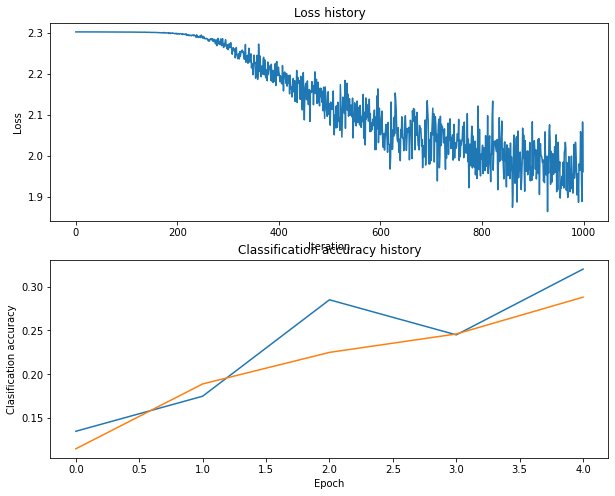

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

scores = net.loss(X)
'''
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))'''

loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133
'''
# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))'''

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    #print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)
'''
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()'''

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/scs231n/assignment1/cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
'''
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
'''


input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
#print('Validation accuracy: ', val_acc)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

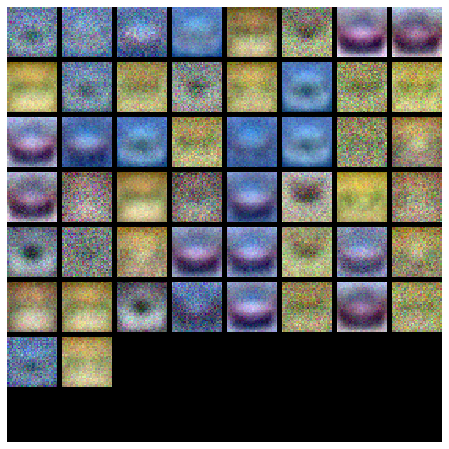

In [ ]:
from past.builtins import xrange

from math import sqrt, ceil
import numpy as np

def visualize_grid(Xs, ubound=255.0, padding=1):
  """
  Reshape a 4D tensor of image data to a grid for easy visualization.
  Inputs:
  - Xs: Data of shape (N, H, W, C)
  - ubound: Output grid will have values scaled to the range [0, ubound]
  - padding: The number of blank pixels between elements of the grid
  """
  (N, H, W, C) = Xs.shape
  grid_size = int(ceil(sqrt(N)))
  grid_height = H * grid_size + padding * (grid_size - 1)
  grid_width = W * grid_size + padding * (grid_size - 1)
  grid = np.zeros((grid_height, grid_width, C))
  next_idx = 0
  y0, y1 = 0, H
  for y in xrange(grid_size):
    x0, x1 = 0, W
    for x in xrange(grid_size):
      if next_idx < N:
        img = Xs[next_idx]
        low, high = np.min(img), np.max(img)
        grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
        # grid[y0:y1, x0:x1] = Xs[next_idx]
        next_idx += 1
      x0 += W + padding
      x1 += W + padding
    y0 += H + padding
    y1 += H + padding
  # grid_max = np.max(grid)
  # grid_min = np.min(grid)
  # grid = ubound * (grid - grid_min) / (grid_max - grid_min)
  return grid

def vis_grid(Xs):
  """ visualize a grid of images """
  (N, H, W, C) = Xs.shape
  A = int(ceil(sqrt(N)))
  G = np.ones((A*H+A, A*W+A, C), Xs.dtype)
  G *= np.min(Xs)
  n = 0
  for y in range(A):
    for x in range(A):
      if n < N:
        G[y*H+y:(y+1)*H+y, x*W+x:(x+1)*W+x, :] = Xs[n,:,:,:]
        n += 1
  # normalize to [0,1]
  maxg = G.max()
  ming = G.min()
  G = (G - ming)/(maxg-ming)
  return G
  
def vis_nn(rows):
  """ visualize array of arrays of images """
  N = len(rows)
  D = len(rows[0])
  H,W,C = rows[0][0].shape
  Xs = rows[0][0]
  G = np.ones((N*H+N, D*W+D, C), Xs.dtype)
  for y in range(N):
    for x in range(D):
      G[y*H+y:(y+1)*H+y, x*W+x:(x+1)*W+x, :] = rows[y][x]
  # normalize to [0,1]
  maxg = G.max()
  ming = G.min()
  G = (G - ming)/(maxg-ming)
  return G

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

In [ ]:
best_net = None # store the best model into this 
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
np.random.seed(1)
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
learning_rates = [3e-3]
regularization_strengths = [0.2, 0.25, 0.5, 1.0]
hidden_sizes = [50, 100]



#learning_rates = [ 1e-1, 5e-7, 1e-6]
#regularization_strengths = [4e5, 5e5, 6e5]

nets = {}
for lr in learning_rates:
    for reg in regularization_strengths:
        for hidden_size in hidden_sizes:
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=2000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=True)
            y_val_pred = net.predict(X_val)
            y_train_pred = net.predict(X_train)
            val_accuracy = np.mean(y_val == y_val_pred)
            train_accuracy = np.mean(y_train == y_train_pred)
            results[(lr, reg, hidden_size)] = (train_accuracy, val_accuracy)
            nets[(lr, reg, hidden_size)] = net

# Print out results.
for lr, reg, hidden_size in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hidden_size)]
    print('lr %e reg %e hidden_size %e train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_size, train_accuracy, val_accuracy))
    if best_val < val_accuracy :
        best_val = val_accuracy
        best_net = nets[(lr, reg, hidden_size)]
        
print('best validation accuracy achieved during cross-validation: %f' % best_val)        
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################


iteration 0 / 2000: loss 2.302840
iteration 100 / 2000: loss 1.711736
iteration 200 / 2000: loss 1.896558
iteration 300 / 2000: loss 1.756014
iteration 400 / 2000: loss 1.853860
iteration 500 / 2000: loss 1.645500
iteration 600 / 2000: loss 1.745984
iteration 700 / 2000: loss 1.714577
iteration 800 / 2000: loss 1.670481
iteration 900 / 2000: loss 1.923020
iteration 1000 / 2000: loss 1.502728
iteration 1100 / 2000: loss 1.754672
iteration 1200 / 2000: loss 1.642293
iteration 1300 / 2000: loss 1.603509
iteration 1400 / 2000: loss 1.429616
iteration 1500 / 2000: loss 1.531343
iteration 1600 / 2000: loss 1.629518
iteration 1700 / 2000: loss 1.578872
iteration 1800 / 2000: loss 1.581643
iteration 1900 / 2000: loss 1.665319
iteration 0 / 2000: loss 2.303181
iteration 100 / 2000: loss 1.759765
iteration 200 / 2000: loss 1.640613
iteration 300 / 2000: loss 1.654724
iteration 400 / 2000: loss 1.969496
iteration 500 / 2000: loss 1.697628
iteration 600 / 2000: loss 1.727312
iteration 700 / 2000: 

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
lr = 3e-3
reg = 0.2
# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 3000: loss 2.302908
iteration 100 / 3000: loss 1.853140
iteration 200 / 3000: loss 1.771181
iteration 300 / 3000: loss 1.816330
iteration 400 / 3000: loss 1.685005
iteration 500 / 3000: loss 1.706990
iteration 600 / 3000: loss 1.583768
iteration 700 / 3000: loss 1.639076
iteration 800 / 3000: loss 1.593667
iteration 900 / 3000: loss 1.671268
iteration 1000 / 3000: loss 1.663951
iteration 1100 / 3000: loss 1.501591
iteration 1200 / 3000: loss 1.495508
iteration 1300 / 3000: loss 1.400013
iteration 1400 / 3000: loss 1.568323
iteration 1500 / 3000: loss 1.587323
iteration 1600 / 3000: loss 1.536983
iteration 1700 / 3000: loss 1.644713
iteration 1800 / 3000: loss 1.550967
iteration 1900 / 3000: loss 1.513397
iteration 2000 / 3000: loss 1.568769
iteration 2100 / 3000: loss 1.592663
iteration 2200 / 3000: loss 1.578863
iteration 2300 / 3000: loss 1.554159
iteration 2400 / 3000: loss 1.369232
iteration 2500 / 3000: loss 1.513366
iteration 2600 / 3000: loss 1.459791
iteration 270

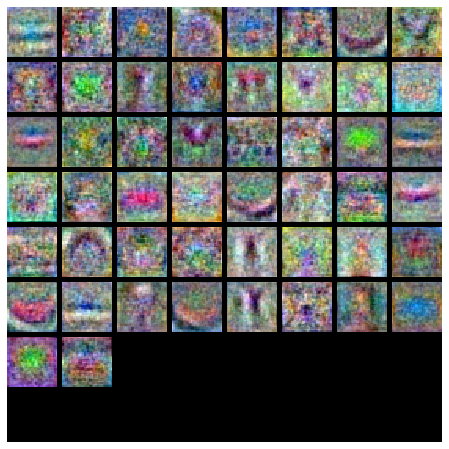

In [ ]:
show_net_weights(best_net)

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.495


## 4. Fooling Images [20 pts]


In [ ]:
#https://github.com/sharma-n/DL_ImageProcessing/blob/master/Saliency_Fooling_StyleTransfer.ipynb

In [ ]:
!git clone https://github.com/chongyangma/cs231n.git

Cloning into 'cs231n'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 26.31 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (193/193), done.


In [ ]:
import tensorflow as tf

NUM_CLASSES = 1000

def fire_module(x,inp,sp,e11p,e33p):
    with tf.compat.v1.variable_scope("fire"):
        with tf.compat.v1.variable_scope("squeeze"):
            W = tf.compat.v1.get_variable("weights",shape=[1,1,inp,sp])
            b = tf.compat.v1.get_variable("bias",shape=[sp])
            s = tf.nn.conv2d(x,W,[1,1,1,1],"VALID")+b
            s = tf.nn.relu(s)
        with tf.compat.v1.variable_scope("e11"):
            W = tf.compat.v1.get_variable("weights",shape=[1,1,sp,e11p])
            b = tf.compat.v1.get_variable("bias",shape=[e11p])
            e11 = tf.nn.conv2d(s,W,[1,1,1,1],"VALID")+b
            e11 = tf.nn.relu(e11)
        with tf.compat.v1.variable_scope("e33"):
            W = tf.compat.v1.get_variable("weights",shape=[3,3,sp,e33p])
            b = tf.compat.v1.get_variable("bias",shape=[e33p])
            e33 = tf.nn.conv2d(s,W,[1,1,1,1],"SAME")+b
            e33 = tf.nn.relu(e33)
        return tf.concat([e11,e33],3)


class SqueezeNet(object):
    def extract_features(self, input=None, reuse=True):
        if input is None:
            input = self.image
        x = input
        layers = []
        with tf.compat.v1.variable_scope('features', reuse=reuse):
            with tf.compat.v1.variable_scope('layer0'):
                W = tf.compat.v1.get_variable("weights",shape=[3,3,3,64])
                b = tf.compat.v1.get_variable("bias",shape=[64])
                x = tf.nn.conv2d(x,W,[1,2,2,1],"VALID")
                x = tf.nn.bias_add(x,b)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer1'):
                x = tf.nn.relu(x)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer2'):
                x = tf.nn.max_pool(x,[1,3,3,1],strides=[1,2,2,1],padding='VALID')
                layers.append(x)
            with tf.compat.v1.variable_scope('layer3'):
                x = fire_module(x,64,16,64,64)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer4'):
                x = fire_module(x,128,16,64,64)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer5'):
                x = tf.nn.max_pool(x,[1,3,3,1],strides=[1,2,2,1],padding='VALID')
                layers.append(x)
            with tf.compat.v1.variable_scope('layer6'):
                x = fire_module(x,128,32,128,128)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer7'):
                x = fire_module(x,256,32,128,128)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer8'):
                x = tf.nn.max_pool(x,[1,3,3,1],strides=[1,2,2,1],padding='VALID')
                layers.append(x)
            with tf.compat.v1.variable_scope('layer9'):
                x = fire_module(x,256,48,192,192)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer10'):
                x = fire_module(x,384,48,192,192)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer11'):
                x = fire_module(x,384,64,256,256)
                layers.append(x)
            with tf.compat.v1.variable_scope('layer12'):
                x = fire_module(x,512,64,256,256)
                layers.append(x)
        return layers

    def __init__(self, save_path=None, sess=None):
        """Create a SqueezeNet model.
        Inputs:
        - save_path: path to TensorFlow checkpoint
        - sess: TensorFlow session
        - input: optional input to the model. If None, will use placeholder for input.
        """
        self.image = tf.compat.v1.placeholder('float',shape=[None,None,None,3],name='input_image')
        self.labels = tf.compat.v1.placeholder('int32', shape=[None], name='labels')
        self.layers = []
        x = self.image
        self.layers = self.extract_features(x, reuse=False)
        self.features = self.layers[-1]
        with tf.compat.v1.variable_scope('classifier'):
            with tf.compat.v1.variable_scope('layer0'):
                x = self.features
                self.layers.append(x)
            with tf.compat.v1.variable_scope('layer1'):
                W = tf.compat.v1.get_variable("weights",shape=[1,1,512,1000])
                b = tf.compat.v1.get_variable("bias",shape=[1000])
                x = tf.nn.conv2d(x,W,[1,1,1,1],"VALID")
                x = tf.nn.bias_add(x,b)
                self.layers.append(x)
            with tf.compat.v1.variable_scope('layer2'):
                x = tf.nn.relu(x)
                self.layers.append(x)
            with tf.compat.v1.variable_scope('layer3'):
                x = tf.nn.avg_pool(x,[1,13,13,1],strides=[1,13,13,1],padding='VALID')
                self.layers.append(x)
        self.classifier = tf.reshape(x,[-1, NUM_CLASSES])

        if save_path is not None:
            saver = tf.compat.v1.train.Saver()
            saver = tf.compat.v1.train.import_meta_graph('/content/squeezenet.ckpt.meta')
            saver.restore(sess, save_path)
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(self.labels, NUM_CLASSES), logits=self.classifier))


In [ ]:
from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
import numpy as np
import os
from skimage.io import imread
import platform

def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000,
                     subtract_mean=True):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for classifiers. These are the same steps as we used for the SVM, but
    condensed to a single function.
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    if subtract_mean:
        mean_image = np.mean(X_train, axis=0)
        X_train -= mean_image
        X_val -= mean_image
        X_test -= mean_image

    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    X_test = X_test.transpose(0, 3, 1, 2).copy()

    # Package data into a dictionary
    return {
      'X_train': X_train, 'y_train': y_train,
      'X_val': X_val, 'y_val': y_val,
      'X_test': X_test, 'y_test': y_test,
    }


def load_tiny_imagenet(path, dtype=np.float32, subtract_mean=True):
    """
    Load TinyImageNet. Each of TinyImageNet-100-A, TinyImageNet-100-B, and
    TinyImageNet-200 have the same directory structure, so this can be used
    to load any of them.
    Inputs:
    - path: String giving path to the directory to load.
    - dtype: numpy datatype used to load the data.
    - subtract_mean: Whether to subtract the mean training image.
    Returns: A dictionary with the following entries:
    - class_names: A list where class_names[i] is a list of strings giving the
      WordNet names for class i in the loaded dataset.
    - X_train: (N_tr, 3, 64, 64) array of training images
    - y_train: (N_tr,) array of training labels
    - X_val: (N_val, 3, 64, 64) array of validation images
    - y_val: (N_val,) array of validation labels
    - X_test: (N_test, 3, 64, 64) array of testing images.
    - y_test: (N_test,) array of test labels; if test labels are not available
      (such as in student code) then y_test will be None.
    - mean_image: (3, 64, 64) array giving mean training image
    """
    # First load wnids
    with open(os.path.join(path, 'wnids.txt'), 'r') as f:
        wnids = [x.strip() for x in f]

    # Map wnids to integer labels
    wnid_to_label = {wnid: i for i, wnid in enumerate(wnids)}

    # Use words.txt to get names for each class
    with open(os.path.join(path, 'words.txt'), 'r') as f:
        wnid_to_words = dict(line.split('\t') for line in f)
        for wnid, words in wnid_to_words.items():
            wnid_to_words[wnid] = [w.strip() for w in words.split(',')]
    class_names = [wnid_to_words[wnid] for wnid in wnids]

    # Next load training data.
    X_train = []
    y_train = []
    for i, wnid in enumerate(wnids):
        if (i + 1) % 20 == 0:
            print('loading training data for synset %d / %d'
                  % (i + 1, len(wnids)))
        # To figure out the filenames we need to open the boxes file
        boxes_file = os.path.join(path, 'train', wnid, '%s_boxes.txt' % wnid)
        with open(boxes_file, 'r') as f:
            filenames = [x.split('\t')[0] for x in f]
        num_images = len(filenames)

        X_train_block = np.zeros((num_images, 3, 64, 64), dtype=dtype)
        y_train_block = wnid_to_label[wnid] * \
                        np.ones(num_images, dtype=np.int64)
        for j, img_file in enumerate(filenames):
            img_file = os.path.join(path, 'train', wnid, 'images', img_file)
            img = imread(img_file)
            if img.ndim == 2:
        ## grayscale file
                img.shape = (64, 64, 1)
            X_train_block[j] = img.transpose(2, 0, 1)
        X_train.append(X_train_block)
        y_train.append(y_train_block)

    # We need to concatenate all training data
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    # Next load validation data
    with open(os.path.join(path, 'val', 'val_annotations.txt'), 'r') as f:
        img_files = []
        val_wnids = []
        for line in f:
            img_file, wnid = line.split('\t')[:2]
            img_files.append(img_file)
            val_wnids.append(wnid)
        num_val = len(img_files)
        y_val = np.array([wnid_to_label[wnid] for wnid in val_wnids])
        X_val = np.zeros((num_val, 3, 64, 64), dtype=dtype)
        for i, img_file in enumerate(img_files):
            img_file = os.path.join(path, 'val', 'images', img_file)
            img = imread(img_file)
            if img.ndim == 2:
                img.shape = (64, 64, 1)
            X_val[i] = img.transpose(2, 0, 1)

    # Next load test images
    # Students won't have test labels, so we need to iterate over files in the
    # images directory.
    img_files = os.listdir(os.path.join(path, 'test', 'images'))
    X_test = np.zeros((len(img_files), 3, 64, 64), dtype=dtype)
    for i, img_file in enumerate(img_files):
        img_file = os.path.join(path, 'test', 'images', img_file)
        img = imread(img_file)
        if img.ndim == 2:
            img.shape = (64, 64, 1)
        X_test[i] = img.transpose(2, 0, 1)

    y_test = None
    y_test_file = os.path.join(path, 'test', 'test_annotations.txt')
    if os.path.isfile(y_test_file):
        with open(y_test_file, 'r') as f:
            img_file_to_wnid = {}
            for line in f:
                line = line.split('\t')
                img_file_to_wnid[line[0]] = line[1]
        y_test = [wnid_to_label[img_file_to_wnid[img_file]]
                  for img_file in img_files]
        y_test = np.array(y_test)

    mean_image = X_train.mean(axis=0)
    if subtract_mean:
        X_train -= mean_image[None]
        X_val -= mean_image[None]
        X_test -= mean_image[None]

    return {
      'class_names': class_names,
      'X_train': X_train,
      'y_train': y_train,
      'X_val': X_val,
      'y_val': y_val,
      'X_test': X_test,
      'y_test': y_test,
      'class_names': class_names,
      'mean_image': mean_image,
    }


def load_models(models_dir):
    """
    Load saved models from disk. This will attempt to unpickle all files in a
    directory; any files that give errors on unpickling (such as README.txt)
    will be skipped.
    Inputs:
    - models_dir: String giving the path to a directory containing model files.
      Each model file is a pickled dictionary with a 'model' field.
    Returns:
    A dictionary mapping model file names to models.
    """
    models = {}
    for model_file in os.listdir(models_dir):
        with open(os.path.join(models_dir, model_file), 'rb') as f:
            try:
                models[model_file] = load_pickle(f)['model']
            except pickle.UnpicklingError:
                continue
    return models


def load_imagenet_val(num=None):
    """Load a handful of validation images from ImageNet.
    Inputs:
    - num: Number of images to load (max of 25)
    Returns:
    - X: numpy array with shape [num, 224, 224, 3]
    - y: numpy array of integer image labels, shape [num]
    - class_names: dict mapping integer label to class name
    """
    imagenet_fn = '/content/cs231n/datasets/imagenet_val_25.npz'
    #imagenet_fn ='/content/CIFAR-10_data/cifar-10-python.npz'
    if not os.path.isfile(imagenet_fn):
      print('file %s not found' % imagenet_fn)
      print('Run the following:')
      print('cd cs231n/datasets')
      print('bash get_imagenet_val.sh')
      assert False, 'Need to download imagenet_val_25.npz'
    f = np.load(imagenet_fn)
    X = f['X']
    y = f['y']
    class_names = f['label_map'].item()
    if num is not None:
        X = X[:num]
        y = y[:num]
    return X, y, class_names

In [ ]:
from __future__ import print_function
from future import standard_library
standard_library.install_aliases()
from builtins import range
import urllib.request, urllib.error, urllib.parse, os, tempfile

import numpy as np
from skimage.transform import resize
from skimage.io import imread


"""
Utility functions used for viewing and processing images.
"""

def blur_image(X):
    """
    A very gentle image blurring operation, to be used as a regularizer for
    image generation.
    Inputs:
    - X: Image data of shape (N, 3, H, W)
    Returns:
    - X_blur: Blurred version of X, of shape (N, 3, H, W)
    """
    from cs231n.fast_layers import conv_forward_fast
    w_blur = np.zeros((3, 3, 3, 3))
    b_blur = np.zeros(3)
    blur_param = {'stride': 1, 'pad': 1}
    for i in range(3):
        w_blur[i, i] = np.asarray([[1, 2, 1], [2, 188, 2], [1, 2, 1]],
                                  dtype=np.float32)
    w_blur /= 200.0
    return conv_forward_fast(X, w_blur, b_blur, blur_param)[0]


SQUEEZENET_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
SQUEEZENET_STD = np.array([0.229, 0.224, 0.225], dtype=np.float32)

def preprocess_image(img):
    """Preprocess an image for squeezenet.
    
    Subtracts the pixel mean and divides by the standard deviation.
    """
    return (img.astype(np.float32)/255.0 - SQUEEZENET_MEAN) / SQUEEZENET_STD


def deprocess_image(img, rescale=False):
    """Undo preprocessing on an image and convert back to uint8."""
    img = (img * SQUEEZENET_STD + SQUEEZENET_MEAN)
    if rescale:
        vmin, vmax = img.min(), img.max()
        img = (img - vmin) / (vmax - vmin)
    return np.clip(255 * img, 0.0, 255.0).astype(np.uint8)


def image_from_url(url):
    """
    Read an image from a URL. Returns a numpy array with the pixel data.
    We write the image to a temporary file then read it back. Kinda gross.
    """
    try:
        f = urllib.request.urlopen(url)
        _, fname = tempfile.mkstemp()
        with open(fname, 'wb') as ff:
            ff.write(f.read())
        img = imread(fname)
        os.remove(fname)
        return img
    except urllib.error.URLError as e:
        print('URL Error: ', e.reason, url)
    except urllib.error.HTTPError as e:
        print('HTTP Error: ', e.code, url)


def load_image(filename, size=None):
    """Load and resize an image from disk.
    Inputs:
    - filename: path to file
    - size: size of shortest dimension after rescaling
    """
    img = imread(filename)
    if size is not None:
        orig_shape = np.array(img.shape[:2])
        min_idx = np.argmin(orig_shape)
        scale_factor = float(size) / orig_shape[min_idx]
        new_shape = (orig_shape * scale_factor).astype(int)
        img = imresize(img, scale_factor)
    return img

In [ ]:
from __future__ import print_function
from future import standard_library
standard_library.install_aliases()
from builtins import range
import urllib.request, urllib.error, urllib.parse, os, tempfile

import numpy as np
from skimage.transform import resize
from skimage.io import imread


"""
Utility functions used for viewing and processing images.
"""

def blur_image(X):
    """
    A very gentle image blurring operation, to be used as a regularizer for
    image generation.
    Inputs:
    - X: Image data of shape (N, 3, H, W)
    Returns:
    - X_blur: Blurred version of X, of shape (N, 3, H, W)
    """
    from cs231n.fast_layers import conv_forward_fast
    w_blur = np.zeros((3, 3, 3, 3))
    b_blur = np.zeros(3)
    blur_param = {'stride': 1, 'pad': 1}
    for i in range(3):
        w_blur[i, i] = np.asarray([[1, 2, 1], [2, 188, 2], [1, 2, 1]],
                                  dtype=np.float32)
    w_blur /= 200.0
    return conv_forward_fast(X, w_blur, b_blur, blur_param)[0]


SQUEEZENET_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
SQUEEZENET_STD = np.array([0.229, 0.224, 0.225], dtype=np.float32)

def preprocess_image(img):
    """Preprocess an image for squeezenet.
    
    Subtracts the pixel mean and divides by the standard deviation.
    """
    return (img.astype(np.float32)/255.0 - SQUEEZENET_MEAN) / SQUEEZENET_STD


def deprocess_image(img, rescale=False):
    """Undo preprocessing on an image and convert back to uint8."""
    img = (img * SQUEEZENET_STD + SQUEEZENET_MEAN)
    if rescale:
        vmin, vmax = img.min(), img.max()
        img = (img - vmin) / (vmax - vmin)
    return np.clip(255 * img, 0.0, 255.0).astype(np.uint8)


def image_from_url(url):
    """
    Read an image from a URL. Returns a numpy array with the pixel data.
    We write the image to a temporary file then read it back. Kinda gross.
    """
    try:
        f = urllib.request.urlopen(url)
        _, fname = tempfile.mkstemp()
        with open(fname, 'wb') as ff:
            ff.write(f.read())
        img = imread(fname)
        os.remove(fname)
        return img
    except urllib.error.URLError as e:
        print('URL Error: ', e.reason, url)
    except urllib.error.HTTPError as e:
        print('HTTP Error: ', e.code, url)


def load_image(filename, size=None):
    """Load and resize an image from disk.
    Inputs:
    - filename: path to file
    - size: size of shortest dimension after rescaling
    """
    img = imread(filename)
    if size is not None:
        orig_shape = np.array(img.shape[:2])
        min_idx = np.argmin(orig_shape)
        scale_factor = float(size) / orig_shape[min_idx]
        new_shape = (orig_shape * scale_factor).astype(int)
        img = imresize(img, scale_factor)
    return img

In [ ]:
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def get_session():
    """Create a session that dynamically allocates memory."""
    # See: https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
    config = tf.compat.v1.ConfigProto
    #config.gpu_options.allow_growth= True
    gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
    sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto())
    #session = tf.compat.v1.Session(config=config)
    return sess

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
!wget "http://cs231n.stanford.edu/squeezenet_tf.zip"
!unzip squeezenet_tf.zip
!rm squeezenet_tf.zip

In [ ]:
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()
sess = get_session()
SAVE_PATH = '/content/squeezenet.ckpt'
if not os.path.exists(SAVE_PATH):
    raise ValueError("You need to download SqueezeNet!")
model = SqueezeNet(save_path=SAVE_PATH, sess=sess)

INFO:tensorflow:Restoring parameters from /content/squeezenet.ckpt


In [ ]:
!wget http://cs231n.stanford.edu/imagenet_val_25.npz

--2021-11-10 23:29:06--  http://cs231n.stanford.edu/imagenet_val_25.npz
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3940548 (3.8M) [text/plain]
Saving to: ‘imagenet_val_25.npz’

imagenet_val_25.npz 100%[===================>]   3.76M  2.51MB/s    in 1.5s    

2021-11-10 23:29:10 (2.51 MB/s) - ‘imagenet_val_25.npz’ saved [3940548/3940548]



In [ ]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
X_raw, y, class_names = load_imagenet_val(num=25)

# restore np.load for future normal usage
np.load = np_load_old

plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_raw[i])
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.gcf().tight_layout()

In [ ]:
X = np.array([preprocess_image(img) for img in X_raw])

grads [<tf.Tensor 'gradients_7/features/layer0/Conv2D_grad/Conv2DBackpropInput:0' shape=(None, None, None, 3) dtype=float32>]
25


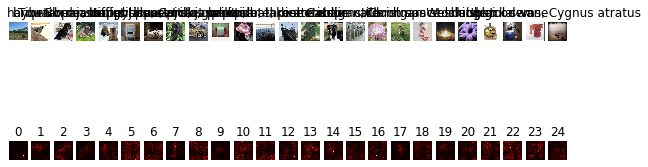

In [ ]:
def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images, numpy array of shape (N, H, W, 3)
    - y: Labels for X, numpy of shape (N,)
    - model: A SqueezeNet model that will be used to compute the saliency map.

    Returns:
    - saliency: A numpy array of shape (N, H, W) giving the saliency maps for the
    input images.
    """
    saliency = None
    # Compute the score of the correct class for each example.
    # This gives a Tensor with shape [N], the number of examples.
    #
    # Note: this is equivalent to scores[np.arange(N), y] we used in NumPy
    # for computing vectorized losses.
    correct_scores = tf.gather_nd(model.classifier,
                                  tf.stack((tf.range(X.shape[0]), model.labels), axis=1))
    ###############################################################################
    # TODO: Implement this function. You should use the correct_scores to compute #
    # the loss, and tf.gradients to compute the gradient of the loss with respect #
    # to the input image stored in model.image.                                   #
    # Use the global sess variable to finally run the computation.                #
    # Note: model.image and model.labels are placeholders and must be fed values  #
    # when you call sess.run().                                                   #
    ###############################################################################
    img_grads = tf.gradients(correct_scores, model.image)
    print('grads',img_grads)
    saliency = tf.abs(img_grads[0])
    saliency = tf.reduce_max(saliency, axis=3)
    saliency = sess.run(saliency, feed_dict={model.image: X, model.labels: y})
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency

def show_saliency_maps(X, y, mask):
    mask = np.asarray(mask)
    Xm = X[mask]
    ym = y[mask]

    saliency = compute_saliency_maps(Xm, ym, model)
    print(mask.size)
    for i in range(mask.size):
        plt.subplot(2, mask.size, i + 1)
        plt.imshow(deprocess_image(Xm[i]))
        plt.axis('off')
        plt.title(class_names[ym[i]])
        plt.subplot(2, mask.size, mask.size + i + 1)
        plt.title(mask[i])
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(10, 4)
    plt.show()

mask = np.arange(25)
show_saliency_maps(X, y, mask)

In [ ]:
def make_fooling_image(X, target_y, model):
    """
    Generate a fooling image that is close to X, but that the model classifies
    as target_y.

    Inputs:
    - X: Input image, of shape (1, 224, 224, 3)
    - target_y: An integer in the range [0, 1000)
    - model: Pretrained SqueezeNet model

    Returns:
    - X_fooling: An image that is close to X, but that is classifed as target_y
    by the model.
    """
    X_fooling = X.copy()
    learning_rate = 1
    ##############################################################################
    # TODO: Generate a fooling image X_fooling that the model will classify as   #
    # the class target_y. Use gradient ascent on the target class score, using   #
    # the model.classifier Tensor to get the class scores for the model.image.   #
    # When computing an update step, first normalize the gradient:               #
    #   dX = learning_rate * g / ||g||_2                                         #
    #                                                                            #
    # You should write a training loop                                           #
    #                                                                            #  
    # HINT: For most examples, you should be able to generate a fooling image    #
    # in fewer than 100 iterations of gradient ascent.                           #
    # You can print your progress over iterations to check your algorithm.       #
    ##############################################################################
    score = model.classifier[0, target_y]
    grads = tf.gradients(score, model.image)
    
    for i in range(100):
        g = sess.run(grads, {model.image: X_fooling})
        dX = learning_rate * g[0] / tf.norm(g[0])
        X_fooling += dX.eval(session=sess)
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return X_fooling

idx = 8
Xi = X[idx][None]
target_y = 6
X_fooling = make_fooling_image(Xi, target_y, model)

# Make sure that X_fooling is classified as y_target
scores = sess.run(model.classifier, {model.image: X_fooling})
assert scores[0].argmax() == target_y, 'The network is not fooled!'

# Show original image, fooling image, and difference
orig_img = deprocess_image(Xi[0])
fool_img = deprocess_image(X_fooling[0])
# Rescale 
plt.subplot(1, 4, 1)
plt.imshow(orig_img)
plt.axis('off')
plt.title(class_names[y[idx]])
plt.subplot(1, 4, 2)
plt.imshow(fool_img)
plt.title(class_names[target_y])
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title('Difference')
plt.imshow(deprocess_image((Xi-X_fooling)[0]))
plt.axis('off')
plt.subplot(1, 4, 4)
plt.title('Magnified difference (10x)')
plt.imshow(deprocess_image(10 * (Xi-X_fooling)[0]))
plt.axis('off')
plt.gcf().tight_layout()